In [28]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from sklearn.model_selection import train_test_split

In [19]:
Walmart = pd.read_csv("C:/Users\Moin Dalvi\Documents\Data Science Material\Data Science\Python\Datasets/footfalls.csv")
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

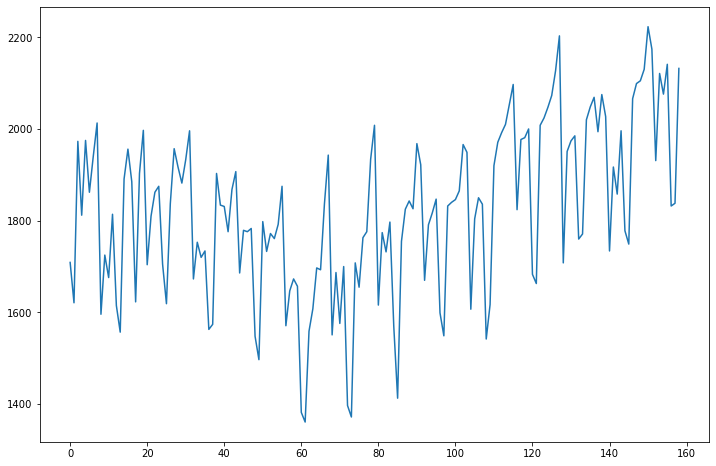

In [4]:
Walmart.Footfalls.plot(figsize=(12,8))

### Moving Average

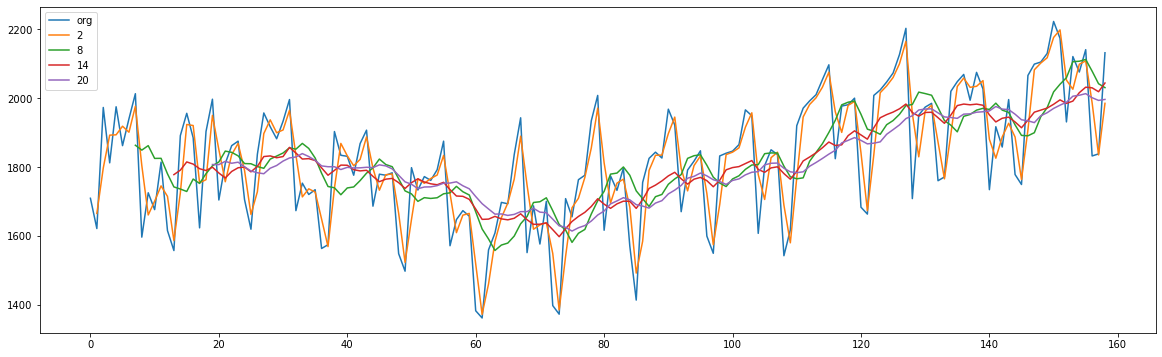

In [21]:
plt.figure(figsize=(20,6))
Walmart.Footfalls.plot(label="org")
for i in range(2,24,6):
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

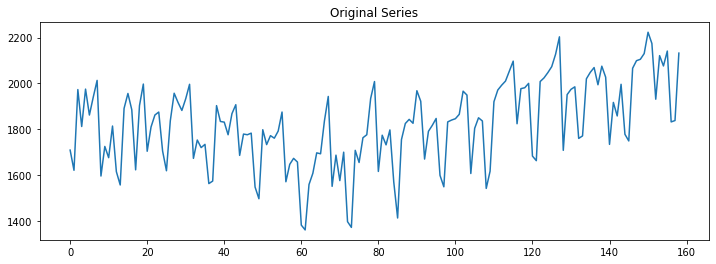

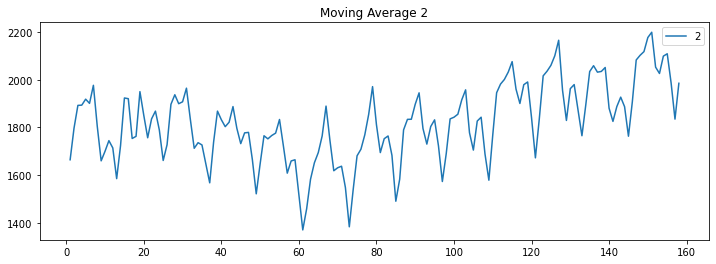

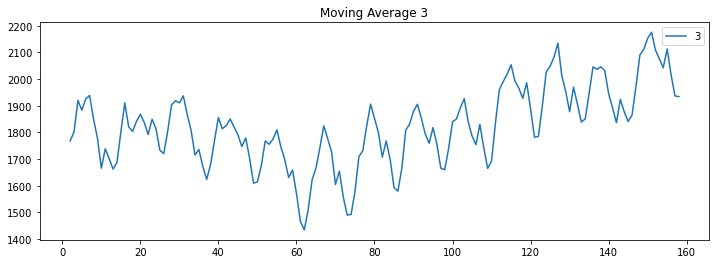

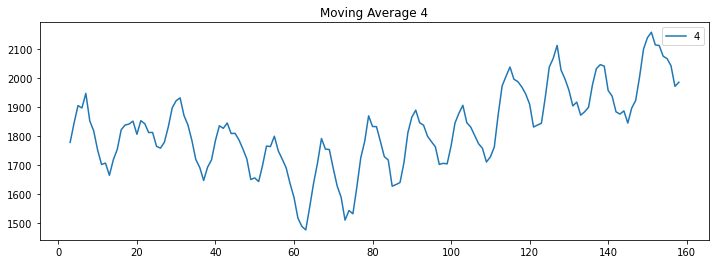

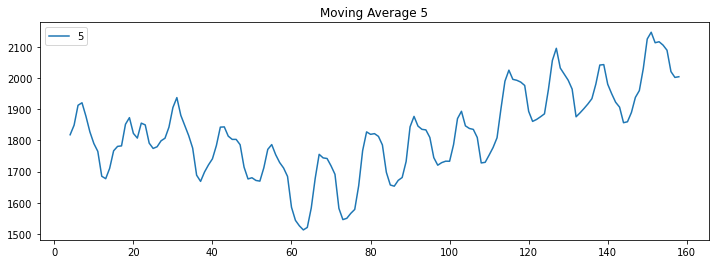

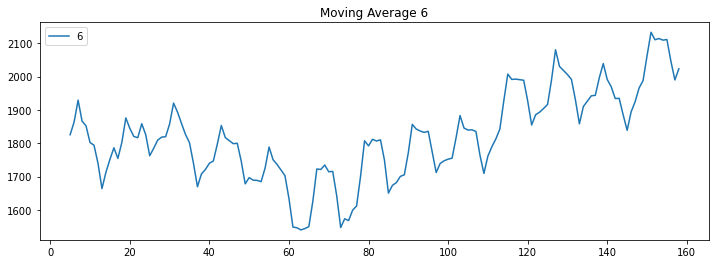

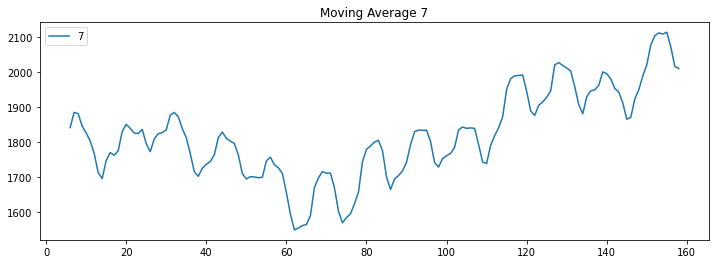

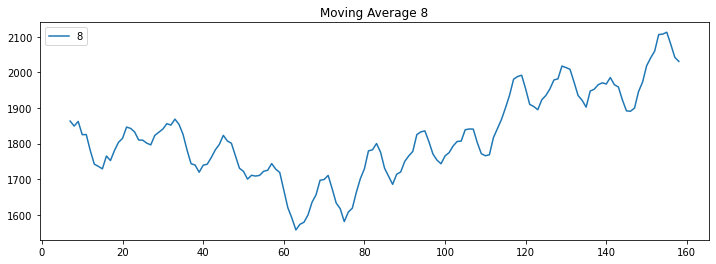

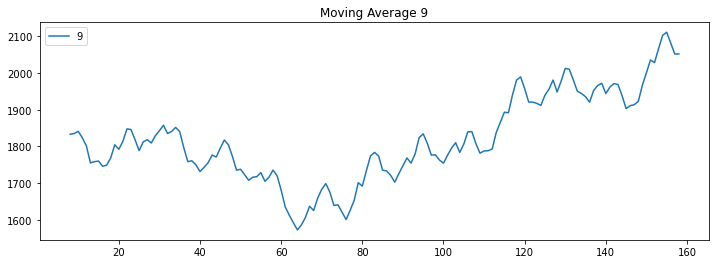

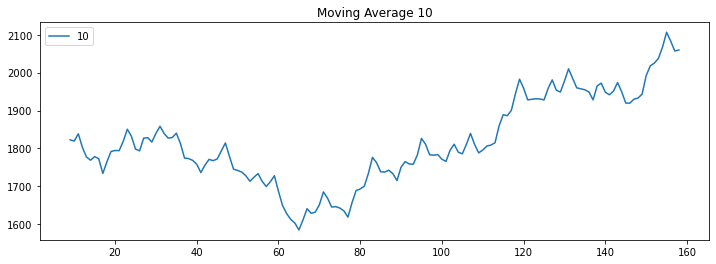

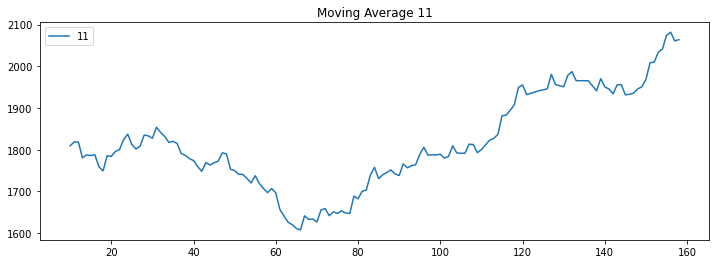

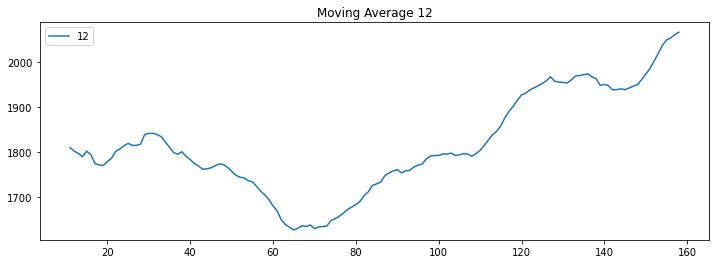

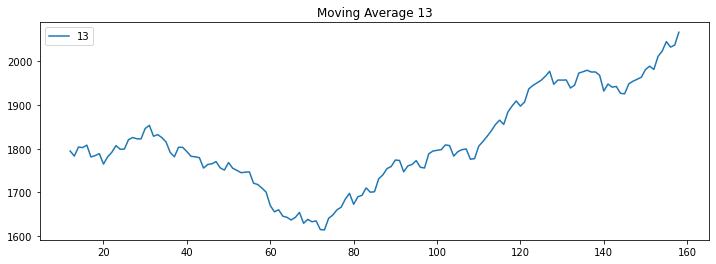

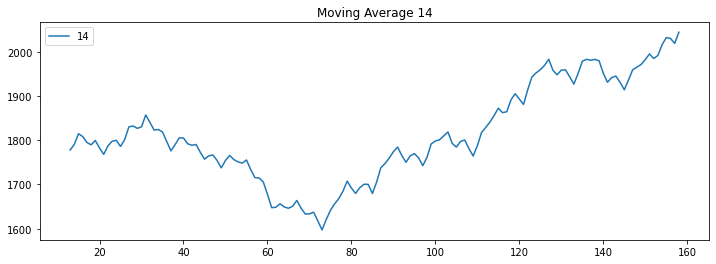

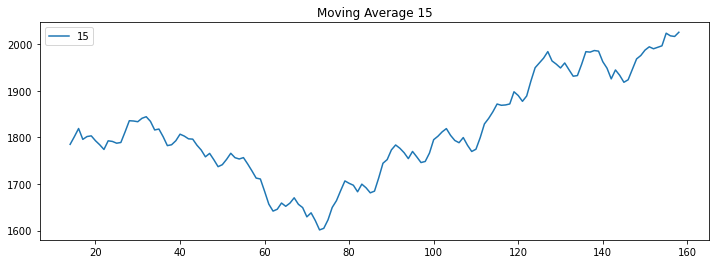

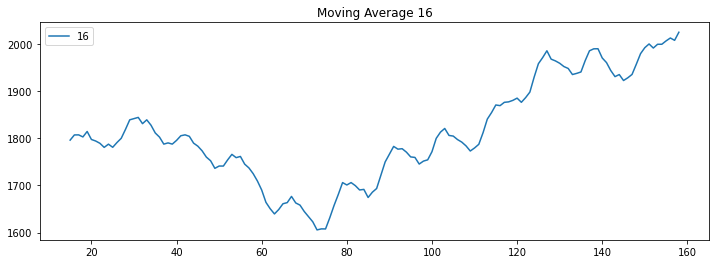

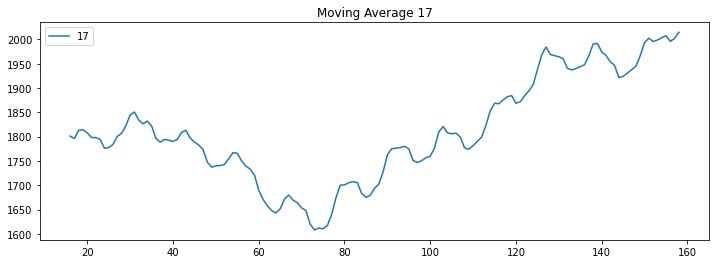

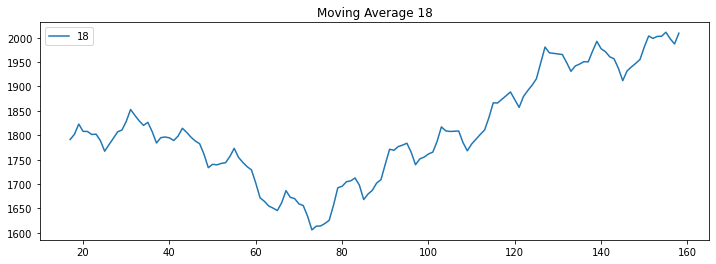

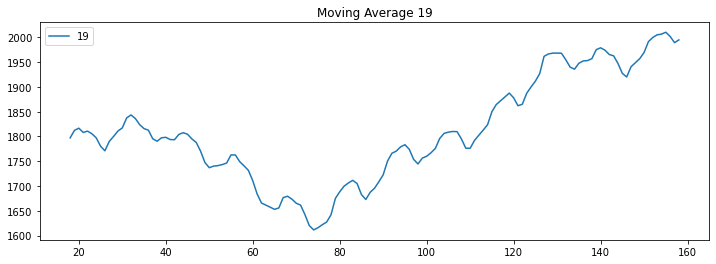

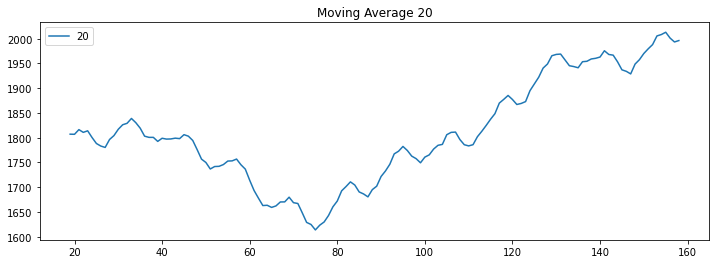

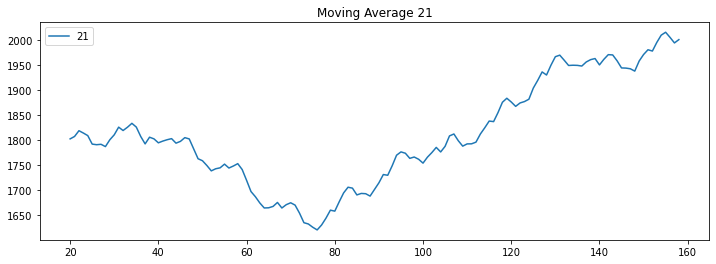

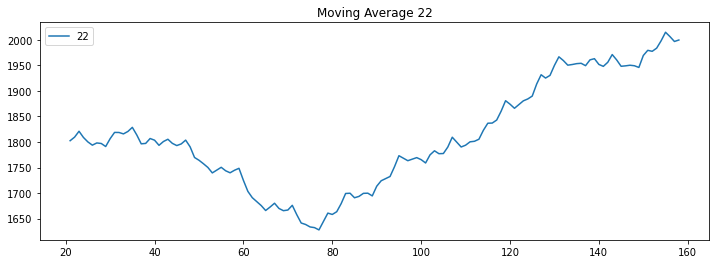

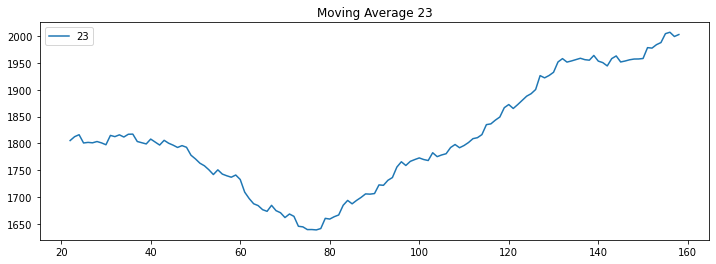

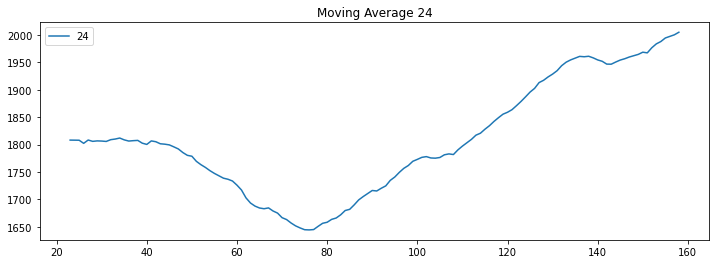

In [19]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
plt.title("Original Series")
for i in range(2,25):
    plt.figure(figsize=(12,4))
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

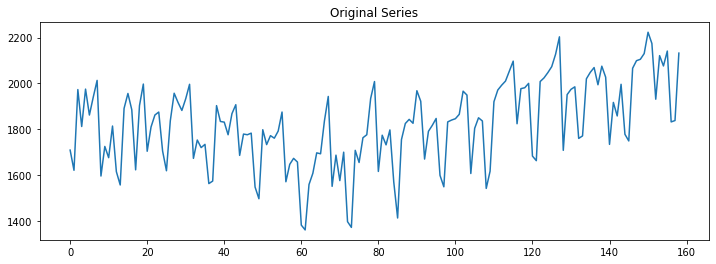

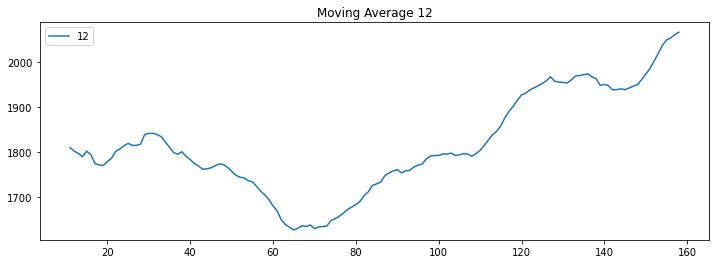

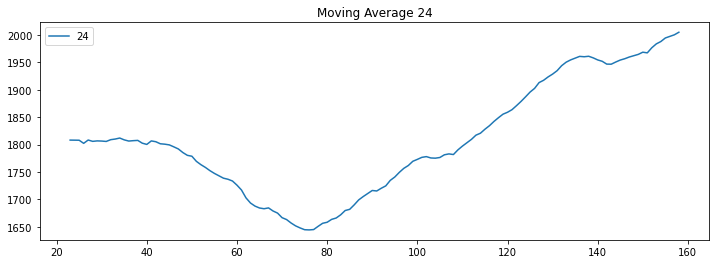

In [22]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label="org")
plt.title("Original Series")
for i in [12,24]:
    plt.figure(figsize=(12,4))
    Walmart["Footfalls"].rolling(i).mean().plot(label=str(i))
    plt.title("Moving Average "+str(i))
    plt.legend(loc='best')
    plt.show()

### Time series decomposition plot 

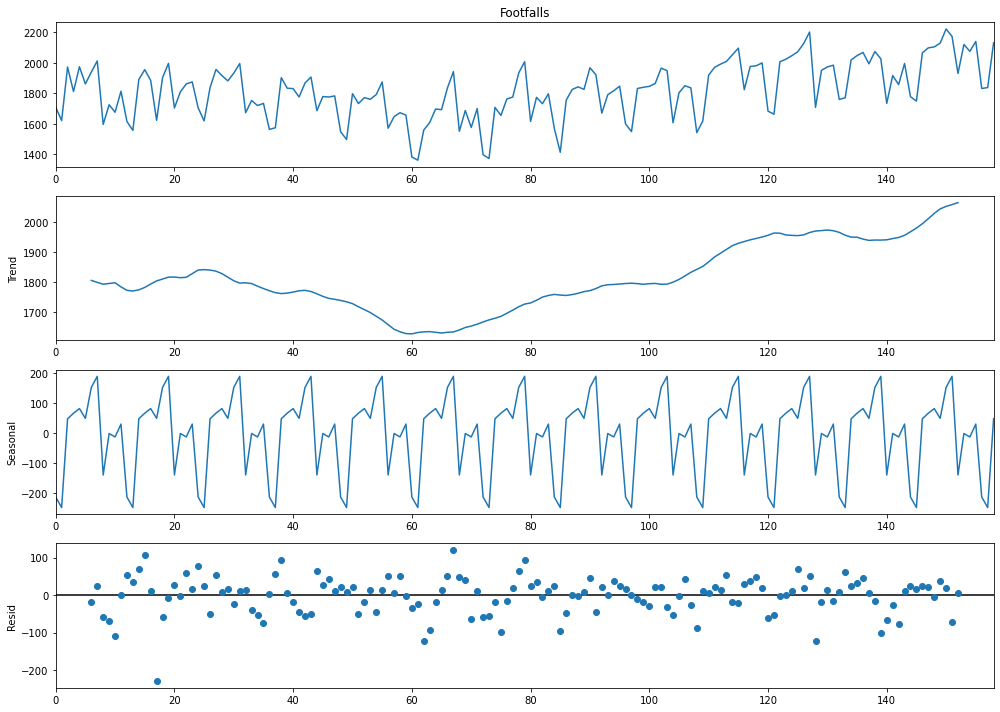

In [28]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,10))
    decompose_ts_add.plot()
    plt.show()

### ACF plots and PACF plots

#### Autocorrelation Function (ACF)
The autocorrelation function (ACF) is a statistical technique that we can use to identify how correlated the values in a time series are with each other. The ACF plots the correlation coefficient against the lag, which is measured in terms of a number of periods or units. A lag corresponds to a certain point in time after which we observe the first value in the time series.

The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables. Also, most often, it is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

It’s most often used to analyze sequences of numbers from random processes, such as economic or scientific measurements. It can also be used to detect systematic patterns in correlated data sets such as securities prices or climate measurements. Usually, we can calculate the ACF using statistical packages from Python and R or using software such as Excel and SPSS. Below, we can see an example of the ACF plot:

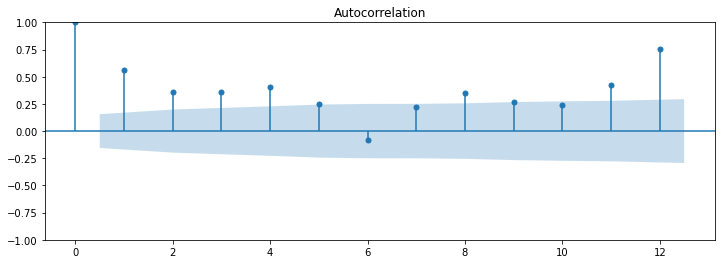

In [40]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(Walmart.Footfalls,lags=12)
    plt.show()

Blue bars on an ACF plot above are the error bands, and anything within these bars is not statistically significant. It means that correlation values outside of this area are very likely a correlation and not a statistical fluke. The confidence interval is set to 95% by default.

Notice that for a lag zero, ACF is always equal to one, which makes sense because the signal is always perfectly correlated with itself.

#### To summarize, autocorrelation is the correlation between a time series (signal) and a delayed version of itself, while the ACF plots the correlation coefficient against the lag, and it’s a visual representation of autocorrelation

#### Partial Autocorrelation Function (PACF)
Partial autocorrelation is a statistical measure that captures the correlation between two variables after controlling for the effects of other variables. For example, if we’re regressing a signal S at lag t (S_{t}) with the same signal at lags t-1, t-2 and t-3 (S_{t-1}, S_{t-2}, S_{t-3}), the partial correlation between S_{t} and S_{t-3} is the amount of correlation between S_{t} and S_{t-3} that isn’t explained by their mutual correlations with S_{t-1} and S_{t-2}.

That being said, the way of finding PACF between S_{t} and S_{t-3} is to use regression model

(1) \begin{align*} S_{t} = \phi_{1}S_{t-1} + \phi_{2}S_{t-2} + \phi_{3}S_{t-3} + \epsilon \end{align*}

where  \phi_{1}, \phi_{2} and \phi_{3} are coefficients and \epsilon is error. From the regression formula above, the PACF value between S_{t} and S_{t-3} is the coefficient \pi_{3}. This coefficient will give us direct effect of time-series S_{t-3} to the time-series S_{t} because the effects of S_{t-2} and S_{t-1} are already captured by \phi_{1} and \phi_{2}.

The figure below presents the PACF plot:

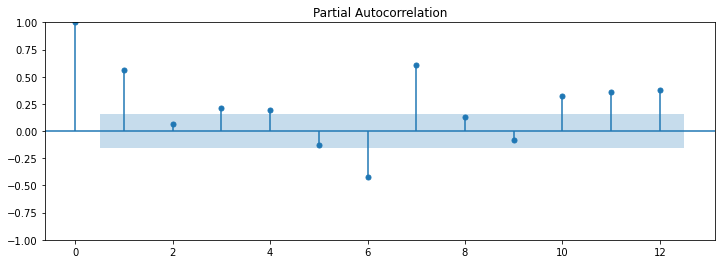

In [29]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_pacf(Walmart.Footfalls,lags=12)
    plt.show()

#### To summarize, a partial autocorrelation function captures a “direct” correlation between time series and a lagged version of itself.

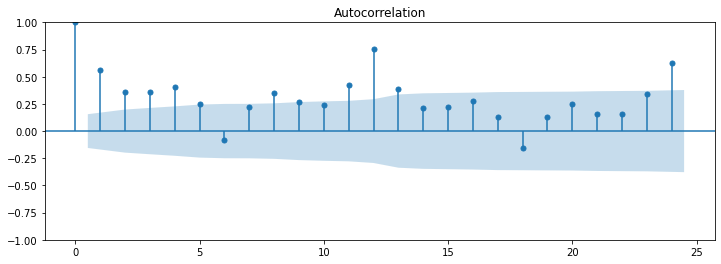

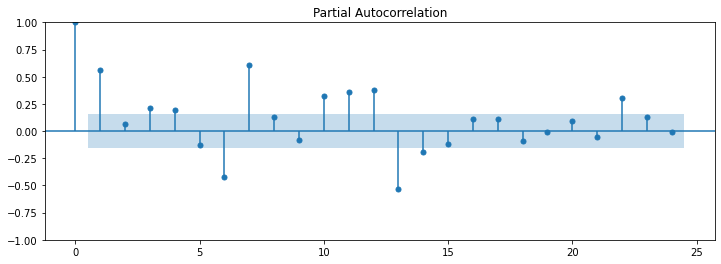

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(12,4))
    tsa_plots.plot_acf(Walmart.Footfalls,lags=24)
    tsa_plots.plot_pacf(Walmart.Footfalls,lags=24)
    plt.show()

### Splitting data

In [8]:
(159*30)/100

47.7

In [9]:
159-48

111

### Splitting Train and Test split with Date

In [20]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

### Evaluation Metric MAPE ( Mean Absolute Percent Error)

In [21]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [13]:
ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Footfalls) 

8.490637057828362

#### Hyperparameter Tuning: Smoothing level

In [26]:
for i in np.arange(0.1, 1.1, 1/10):
    ses_model = SimpleExpSmoothing(Train["Footfalls"]).fit(smoothing_level=i)
    pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
    score = MAPE(pred_ses,Test.Footfalls)
    print("smoothing_level = {}".format(i),"--->","Mape_Score",score)

smoothing_level = 0.1 ---> Mape_Score 8.156530408095183
smoothing_level = 0.2 ---> Mape_Score 8.490637057828362
smoothing_level = 0.30000000000000004 ---> Mape_Score 8.54755933689483
smoothing_level = 0.4 ---> Mape_Score 8.30551165744981
smoothing_level = 0.5 ---> Mape_Score 7.883269488216077
smoothing_level = 0.6 ---> Mape_Score 7.450068877108953
smoothing_level = 0.7000000000000001 ---> Mape_Score 6.933162504825567
smoothing_level = 0.8 ---> Mape_Score 6.346703799205588
smoothing_level = 0.9 ---> Mape_Score 5.704508253618705
smoothing_level = 1.0 ---> Mape_Score 5.025197974690909


### Holt's method 

In [32]:
# Holt method 
hw_model = Holt(Train["Footfalls"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Footfalls) 

7.546249229496066

### Holts winter exponential smoothing with additive seasonality and additive trend

In [15]:
hwe_model_add_add = ExponentialSmoothing(Train["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls) 

2.5322506663514317

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [16]:
hwe_model_mul_add = ExponentialSmoothing(Train["Footfalls"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Footfalls)

2.925700577656594

### Final Model by combining train and test

In [34]:
hwe_model_add_add = ExponentialSmoothing(Walmart["Footfalls"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Footfalls)

1.5701140940907654

In [11]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2152.940260
160    2183.176551
161    2157.282668
162    2247.492475
163    2280.194967
164    1971.371437
165    2130.500253
166    2110.869474
167    2155.897424
168    1907.036847
dtype: float64